In [25]:
import gymnasium as gym
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from main import evaluate, BrownianPolicy
from tqdm import tqdm

In [31]:
# Collecting trajectories

env = gym.make("Ant-v4")
# env = gym.wrappers.RecordVideo(env, './video', episode_trigger=lambda x: True)
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.shape
policy = BrownianPolicy(obs_dim, act_dim)
rewards = []
trajs = []
for i in tqdm(range(100)):
    r, o, a = evaluate(env, policy)
    rewards.append(r)
    trajs.append(o)

100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


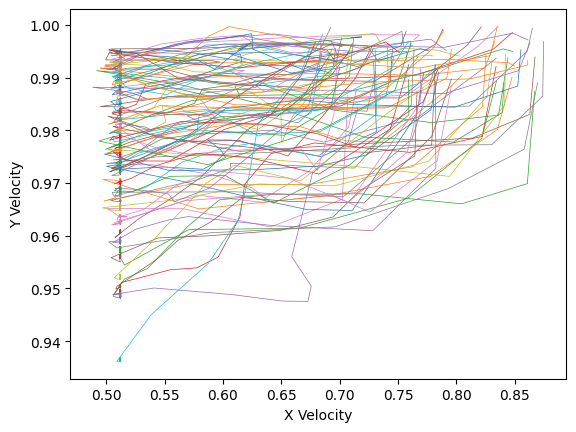

: 

In [32]:
# Analyzing collected trajectories

# plot (x, y)

for traj in trajs:
    x = [e[0] for e in traj]
    y = [e[1] for e in traj]
    x_vel = [e[2] for e in traj]
    y_vel = [e[3] for e in traj]
    angle = [e[4] for e in traj]
    angle_v = [e[5] for e in traj] 
    t = range(len(x_vel)) 
    plt.plot(x, y, linewidth=0.5)

plt.xlabel("X Velocity")
plt.ylabel("Y Velocity")
plt.show()